<span style="font-family:Avenir;">
<font color="yellow"> <h1> Expected </font> Language Archivals </h1> 
</span>

<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Stating Questions </h2> </font>
</span>



<span style="font-family:Avenir; font-size:1.4em;">
✦ <font color="Cyan"> What </font>
<font color="Pink"> programming language </font> is
<font color="Cyan"> expected</font>  to have the
<font color="Pink"> most repos archived </font> in
<font color="Cyan">2023</font>?

</span>



<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Its as expected
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      This is my data
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Suppose data is expectations; done.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Exploratory Data Analytics</h2> </font>
</span>

#### Imports

In [1]:
import sys; sys.path.append('../../')
from DataPreparation.Preprocess import read_data, get_date_features
from DataPreparation.Visualize import convey_insights
import numpy as np
import pandas as pd

#### Read the Data

In [4]:
x_data_d, _ = read_data(kind="all", fix=True)
x_data_d = get_date_features(x_data_d, 'createdAt', merge=True)

,stars,forks,watchers,isArchived,diskUsageKb,pullRequests,primaryLanguage,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,languagesUsed,languagesSizes,hour,day_of_week,day_of_year,month,quarter,year
0,18,46,25,0,354726,810,JavaScript,3404.0,MIT License,94,-1,"JavaScript, HTML, CSS, Ruby, Shell","440575, 440476, 137861, 11340, 878",0,1,239,8,3,2019
1,5,4,2,0,3016,0,C,170.0,Other,1,-1,"C, CoffeeScript, JavaScript, Python, Ruby","1639525, 19776, 10833, 8042, 128",15,3,118,4,2,2011
2,33,3,1,1,3238,20,JavaScript,153.0,GNU General Public License v3.0,1,-1,JavaScript,84201,11,3,16,1,1,2020
3,9,6,2,0,628,2,C#,4.0,Microsoft Public License,1,-1,"C#, Puppet","17202, 856",14,0,174,6,2,2014
4,14,4,2,0,7607,2,Python,11.0,-1,1,-1,Python,29392,3,3,200,7,3,2018


In [15]:
### EDA code goes here
def archival_overtime(x_data_d):
    '''
    For each year find the number and fractio of archivals for each language
    '''
    x_data_t = []
    # Make a dataset for each year
    for year in range(2009, 2023):
        # Get the data for that year
        x_data = x_data_d[x_data_d['year'] == year]
        # Get the unique languages
        langs = x_data['primaryLanguage'].unique()
        # For each language
        for lang in langs:
            # Get the data for that language
            lang_data = x_data[x_data['primaryLanguage'] == lang]
            # Get the number of repos in that language
            num_lang_repos = len(lang_data)
            # Get the number of repos in that language with isArchived = 1
            num_archived_lang_repos = len(lang_data[lang_data['isArchived'] == 1])
            # Get the fraction of repos in that language with isArchived = 1
            frac_archived_lang_repos = num_archived_lang_repos / num_lang_repos
            # Append the data to the list
            x_data_t.append([year, lang, num_lang_repos, num_archived_lang_repos, frac_archived_lang_repos])
    
    return x_data_t


x_data_t = archival_overtime(x_data_d)
# save x_data_t as a csv with columns year, language, num_lang_repos, num_archived_lang_repos, frac_archived_lang_repos
x_data_t = pd.DataFrame(x_data_t, columns=['year', 'language', 'num_lang_repos', 'num_archived_lang_repos', 'frac_archived_lang_repos'])
x_data_t.to_csv('archival_overtime.csv', index=False)

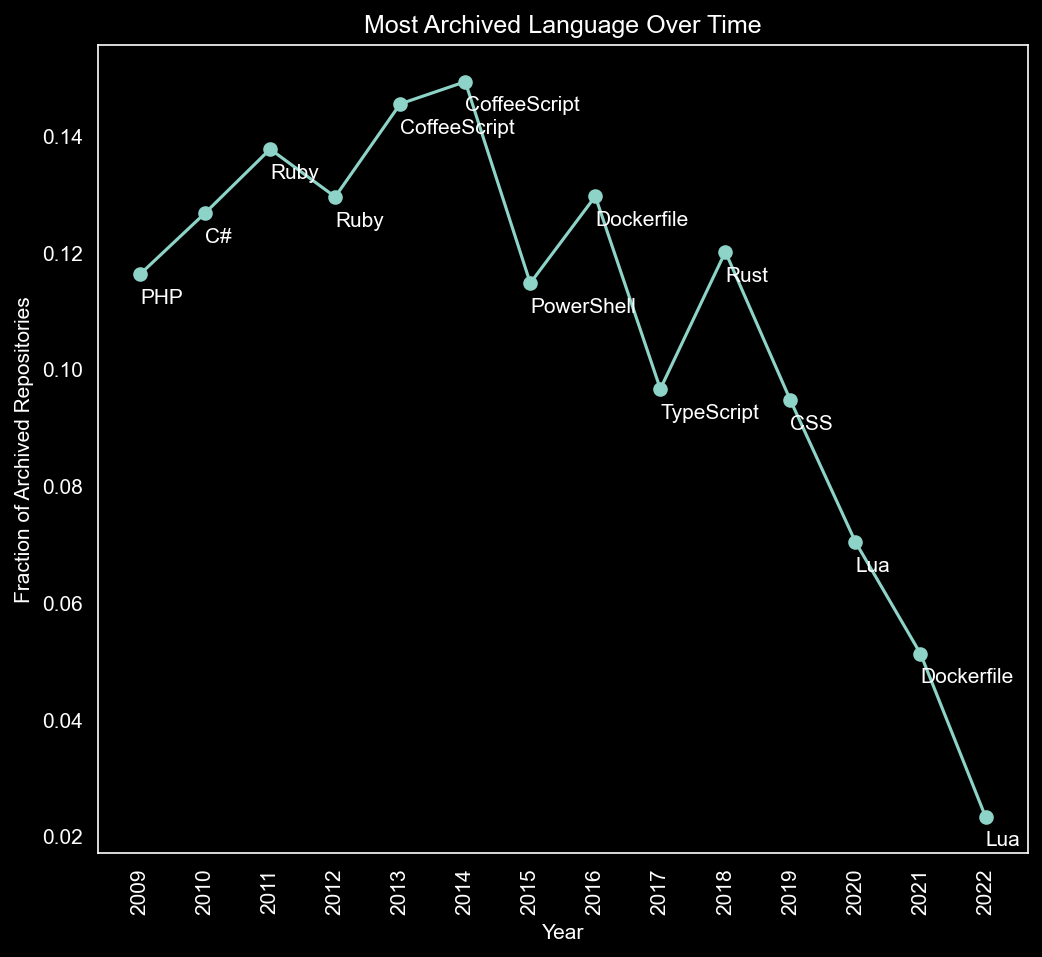

In [39]:
# Now for each year let's find the most archived language
def most_archived_lang(x_data_t):
    # drop any row with less than 50 language repos
    x_data_t = x_data_t[x_data_t['num_lang_repos'] >= 50]
    x_data_t = x_data_t.sort_values(by='frac_archived_lang_repos', ascending=False)
    x_data_t = x_data_t.drop_duplicates(subset='year', keep='first')
    x_data_t = x_data_t.sort_values(by='year')
    return x_data_t

x_data_t = most_archived_lang(x_data_t)

x_data_t

# save x_data_t as a csv
x_data_t.to_csv('most_archived_lang.csv', index=False)

# Plot the data in a line plot where the language is written on each point and the x-axis is year, y-axis is frac_archived_lang_repos
import matplotlib.pyplot as plt

# dark mode
plt.style.use('dark_background')
# increase dpi
plt.rcParams['figure.dpi'] = 150

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(x_data_t['year'], x_data_t['frac_archived_lang_repos'], marker='o')
for i, lang_name in enumerate(x_data_t['language']):
    ax.annotate(lang_name, (x_data_t['year'].iloc[i], -0.005 + x_data_t['frac_archived_lang_repos'].iloc[i]))

ax.set_xlabel('Year')
ax.set_ylabel('Fraction of Archived Repositories')
ax.set_title('Most Archived Language Over Time')
ax.set_xticks(x_data_t['year'])
ax.set_xticklabels(x_data_t['year'])
plt.xticks(rotation=90)
plt.show()


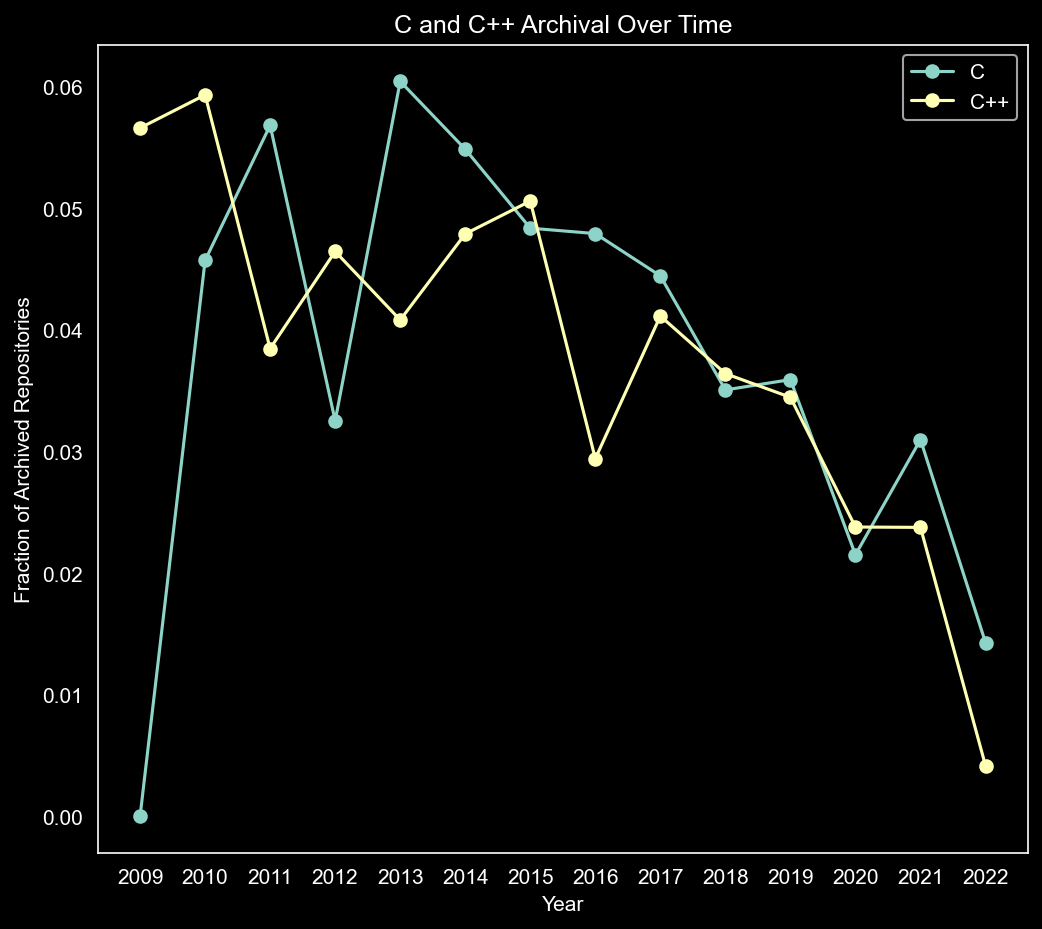

In [40]:
# C and C++ Archival overtime
def archival_overtime_c_cpp(x_data_d, lang):
    '''
    Find the yearly number of archives for a given language
    '''
    x_data_t = []
    # Make a dataset for each year
    for year in range(2009, 2023):
        # Get the data for that year
        x_data = x_data_d[x_data_d['year'] == year]
        # Get the rows with the language
        x_data = x_data[x_data['primaryLanguage'] == lang]
        # Count the number of archives
        num_archives = len(x_data[x_data['isArchived'] == 1])
        # Count the number of repos
        num_repos = len(x_data)
        # Append the data to the list
        frac_archives = num_archives / num_repos
        x_data_t.append([year, num_archives, num_repos, frac_archives])
        
    return x_data_t
        
        
x_data_c = archival_overtime_c_cpp(x_data_d, 'C')
x_data_cpp = archival_overtime_c_cpp(x_data_d, 'C++')

# save 
x_data_c = pd.DataFrame(x_data_c, columns=['year', 'num_archives', 'num_repos', 'frac_archives'])
x_data_cpp = pd.DataFrame(x_data_cpp, columns=['year', 'num_archives', 'num_repos', 'frac_archives'])

x_data_c.to_csv('archival_overtime_c.csv', index=False)
x_data_cpp.to_csv('archival_overtime_cpp.csv', index=False)

# Plot both time series on the same plot
# set darkgrid style
plt.style.use('dark_background')
# increase dpi
plt.rcParams['figure.dpi'] = 150

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(x_data_c['year'], x_data_c['frac_archives'], marker='o', label='C')
ax.plot(x_data_cpp['year'], x_data_cpp['frac_archives'], marker='o', label='C++')
ax.set_xlabel('Year')
ax.set_ylabel('Fraction of Archived Repositories')
ax.set_title('C and C++ Archival Over Time')
ax.set_xticks(x_data_c['year'])
ax.set_xticklabels(x_data_c['year'])
ax.legend()
plt.show()




<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Its as expected
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      This is my data
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Suppose data is expectations; done.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Model Building</h2> </font>
</span>

In [ ]:
### Model building code goes her

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Its as expected
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      This is my data
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Suppose data is expectations; done.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Results & Interpretation</h2> </font>
</span>

In [ ]:
### Probably code that will generate markdown

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Its as expected
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      This is my data
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Suppose data is expectations; done.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Communicating Results</h2> </font>
</span>

In [ ]:
### Probably code that will generate markdown

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Its as expected
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      This is my data
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Suppose data is expectations; done.
      </td>
    </tr>
  </tbody>
</table>

</span>

